In [189]:
#importing all necessary Librarires.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics as stat

In [149]:
data = pd.read_csv(r'D:\D_S & D_A\ICTAK\Datasets\Sales_add.csv')

In [150]:
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [152]:
data.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

### Basic Stat Values of the Dataset.

In [153]:
stat.mean(data['Sales_before_digital_add(in $)'])

149239.95454545456

In [154]:
stat.mean(data['Sales_After_digital_add(in $)'])

231123.72727272726

In [155]:
stat.median(data['Sales_before_digital_add(in $)'])

147444.0

In [156]:
stat.median(data['Sales_After_digital_add(in $)'])

229986.5

In [157]:
stat.stdev(data['Sales_before_digital_add(in $)'])

14844.042920846421

In [158]:
stat.stdev(data['Sales_After_digital_add(in $)'])

25556.777060725042

In [159]:
stat.variance(data['Sales_before_digital_add(in $)'])

220345610.23593074

In [160]:
stat.variance(data['Sales_After_digital_add(in $)'])

653148853.7316017

In [311]:
data['Sales_before_digital_add(in $)'].skew()
#if the skewness value is between -1 & -1/2 or b/w +1/2 & +1 : Moderately Skewed Distribution

0.5780328152845783

In [312]:
data['Sales_After_digital_add(in $)'].skew()
#if the skewness value <-1 or >+1 : Highly Skewed Distribution

-0.02266883113277529

# ● The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

H0 = "No Increase in Sales" After Stepping into Digital Marketing

HA = "Increase in Sales" After Stepping into Digital Marketing

"Here after the analysis, it is noticable that use of 'T-Test for Two Sample' is applicable."

In [164]:
from scipy.stats import ttest_ind

In [165]:
data.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

In [166]:
ttest_ind(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'])

Ttest_indResult(statistic=-12.995084451110875, pvalue=2.614368006904645e-16)

In [167]:
t_test,p_value = ttest_ind(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'])

In [168]:
p_value

2.614368006904645e-16

In [314]:
if p_value<0.05:
    print('Null Hypothesis H0 is Rejected')
else:
    print('Null Hypothesis H0 is Accepted')

Null Hypothesis H0 is Rejected


#### Inference: Thus with this result we can say that HA = "Increase in Sales" After Stepping into Digital Marketing is "Accepted".

# ● The company needs to check whether there is any dependency between the features “Region” and “Manager”.

H0: There is NO Dependency between the features “Region” and “Manager”

HA: There is Dependency between the features “Region” and “Manager”

Methodology: "Here after the analysis, it is noticeable that use of 'Chi-Square Of Association' is appliable."

In [170]:
from scipy.stats import chi2_contingency

In [171]:
relation_data = (data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'])

In [172]:
chi2_contingency(relation_data)

(50418.98816785626,
 0.0,
 21,
 array([[158243.59208   , 146308.74878564, 153225.29220049,
         150656.89571799, 163978.34352948, 154633.8689454 ,
         138397.96206394, 141947.26157215, 155971.42831125,
         131712.12704074, 142236.43178413, 178609.8854221 ,
         137421.37501155, 158767.00193451, 147841.311673  ,
         143015.66114775, 147437.57198762, 141058.95579207,
         140926.337703  , 143240.09176003, 161187.08587953,
         146461.76965765],
        [245067.40792   , 226584.25121436, 237295.70779951,
         233318.10428201, 253948.65647052, 239477.1310546 ,
         214333.03793606, 219829.73842785, 241548.57168875,
         203978.87295926, 220277.56821587, 276608.1145779 ,
         212820.62498845, 245877.99806549, 228957.688327  ,
         221484.33885225, 228332.42801238, 218454.04420793,
         218248.662297  , 221831.90823997, 249625.91412047,
         226821.23034235]]))

In [173]:
chi_stat,p_value1,dof,relation = chi2_contingency(relation_data)

In [174]:
p_value1

0.0

In [315]:
if p_value1<0.05:
    print('Null Hypothesis Rejected')
else:
    print('Null Hypothesis Accepted')

Null Hypothesis Rejected


#### Inference: Thus with this result we can say that "HA = There is a Dependency between the features 'Region' and 'Manager' is Accepted."
#### For further conclusion I came up with the idea of plotting a graph to find whether it's related or not; please refer below.

In [176]:
data['Sales_Difference'] = (data['Sales_After_digital_add(in $)']-data['Sales_before_digital_add(in $)'])

In [177]:
data['Sales_Percentage'] = (data['Sales_Difference']/data['Sales_After_digital_add(in $)'])*100

In [178]:
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $),Sales_Difference,Sales_Percentage
0,Month-1,Region - A,Manager - A,132921,270390,137469,50.841007
1,Month-2,Region - A,Manager - C,149559,223334,73775,33.033483
2,Month-3,Region - B,Manager - A,146278,244243,97965,40.109645
3,Month-4,Region - B,Manager - B,152167,231808,79641,34.356450
4,Month-5,Region - C,Manager - B,159525,258402,98877,38.264797


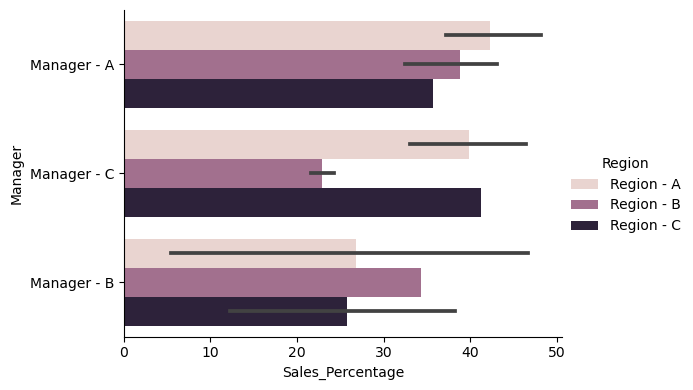

In [334]:
sns.catplot(data=data, y="Manager", x="Sales_Percentage",hue="Region",kind="bar", height=4,aspect=1.5,palette='ch:6')
plt.show()

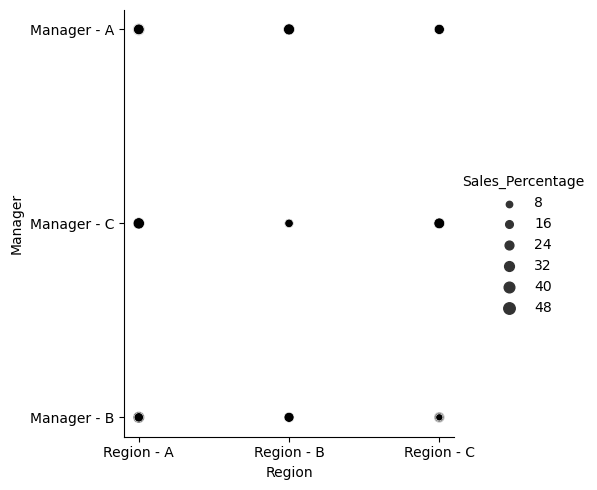

In [330]:
sns.relplot(data=data, y="Manager", size="Sales_Percentage",x="Region", color='k')

#### Conclusion : With the above two plots, it's understood that Respective "Managers" have dependence wrt "Regions"